In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW'
gdown.download(url, quiet=False, output='/content/gdrive/MyDrive/dataset')

In [ ]:
# title brand csv
import gdown
url = 'https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h'
gdown.download(url, output='/content/gdrive/MyDrive/title-brand')

Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/gdrive/MyDrive/title-brand
100%|██████████| 97.3M/97.3M [00:00<00:00, 103MB/s] 


'/content/gdrive/MyDrive/title-brand'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dataset_path = '/content/gdrive/MyDrive/dataset'
df = pd.read_csv(dataset_path)

<ipython-input-3-8b6ebaa75899>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [ ]:
title_brand_path = '/content/gdrive/MyDrive/title-brand'
title_brand = pd.read_csv(title_brand_path)

In [ ]:
title_brand.set_index('asin', inplace=True)
title_brand.head()

,title,brand
asin,,
0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [ ]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


<Axes: xlabel='overall', ylabel='percent'>

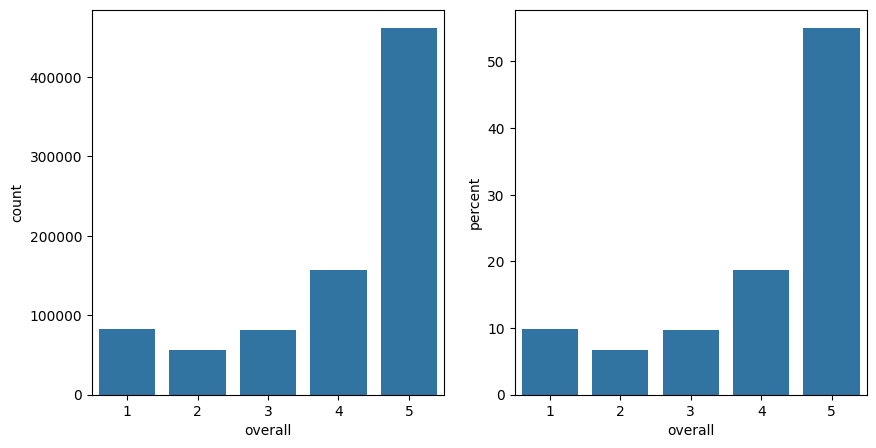

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(df, x='overall', ax=ax[0])
sns.countplot(df, x='overall', stat='percent', ax=ax[1])

In [ ]:
len(df.asin.unique())

90715

In [ ]:
df.overall.value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         838944 non-null  int64  
 1   vote            838944 non-null  float64
 2   verified        838944 non-null  bool   
 3   reviewTime      838944 non-null  object 
 4   reviewerID      838944 non-null  object 
 5   asin            838944 non-null  object 
 6   style           490613 non-null  object 
 7   reviewerName    838717 non-null  object 
 8   reviewText      838944 non-null  object 
 9   summary         838868 non-null  object 
 10  unixReviewTime  838944 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 64.8+ MB


In [ ]:
# fill null value:
df.vote.fillna(0, inplace=True)
df.vote = df.vote.str.replace(',', '.', regex=False)
df.vote = df.vote.astype(np.float_)

# strip texts
df.reviewText = df.reviewText.str.strip()

# df.drop(columns=['style', 'reviewerName', 'reviewTime', 'vote'], inplace=True)

<Axes: xlabel='verified', ylabel='percent'>

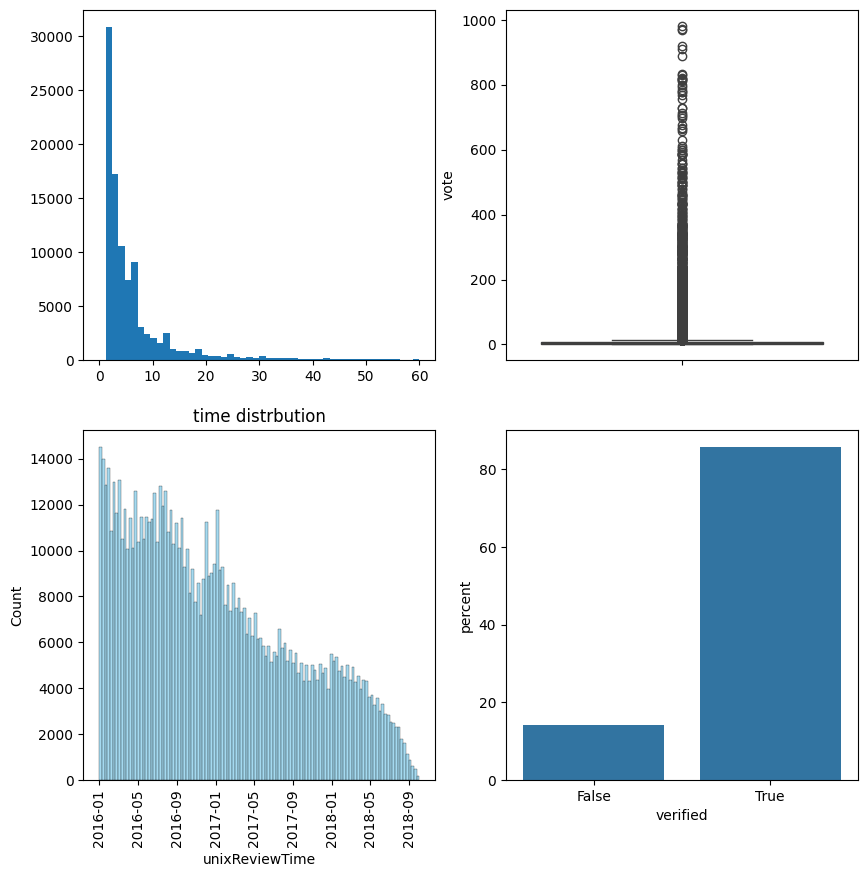

In [ ]:
# drawing some plots

# helpful votes:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].hist(df.vote.values, range=(0, 60), bins=50)
sns.boxplot(data=df.vote, ax=ax[0, 1])

#time
time = pd.to_datetime(df.unixReviewTime, unit='s')
sns.histplot(data=time, color='skyblue', ax=ax[1, 0]).set_title('time distrbution')
ax[1, 0].tick_params(axis='x', rotation=90)

#verified
sns.countplot(data=df, x='verified', stat='percent', ax=ax[1, 1])

In [ ]:
# unVerifieds
unverified = df[~df.verified]
sample = pd.DataFrame(unverified.sample(n=5))

for i in range(5):
  row = sample.iloc[i]
  print(row['overall'], title_brand.loc[row['asin']].title, '\n', row['summary'])

NameError: name 'title_brand' is not defined

In [ ]:
# divide datas into three category
# positive, negetive, neutral
def get_emotion(overall :float) -> str:
  if overall == 4 or overall == 5:
    return 'positive'
  if overall == 3:
    return 'neutral'
  return 'negetive'

df['emotion'] = df.overall.apply(get_emotion)
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,emotion
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,negetive
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,positive
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,positive
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,positive
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,positive


In [ ]:
posisitive_df = df[df.emotion == 'positive']
negetive_df = df[df.emotion == 'negetive']
neutral_df = df[df.emotion == 'neutral']

print(len(posisitive_df), len(neutral_df), len(negetive_df))

617999 81239 139706


In [ ]:
custom_stopwords = ['https', 'http', 'com', 'www', 'said', 'will', 'new', 'also', 'like', 'just', 'get', 'make', 'go',
                    'know', 'think', 'see', 'look', 'want', 'need', 'take', 'use', 'find', 'give', 'tell', 'ask', 'show',
                    'help', 'work', 'time', 'day', 'year', 'people', 'thing', 'way', 'lot', 'part', 'group', 'kind', 'case',
                    'point', 'view', 'fact', 'thing', 'man', 'woman', 'child', 'mr', 'mrs', 'ms', 'dr', 'prof', 'etc']

In [ ]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS).union(custom_stopwords)

wordcloud_images = []

for emotion_df in [posisitive_df, neutral_df, negetive_df]:
  comment_words = ''
  for val in emotion_df.summary:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens) + " "

  wordcloud = WordCloud(width=1600, height=1600,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

  wordcloud_images.append(wordcloud)


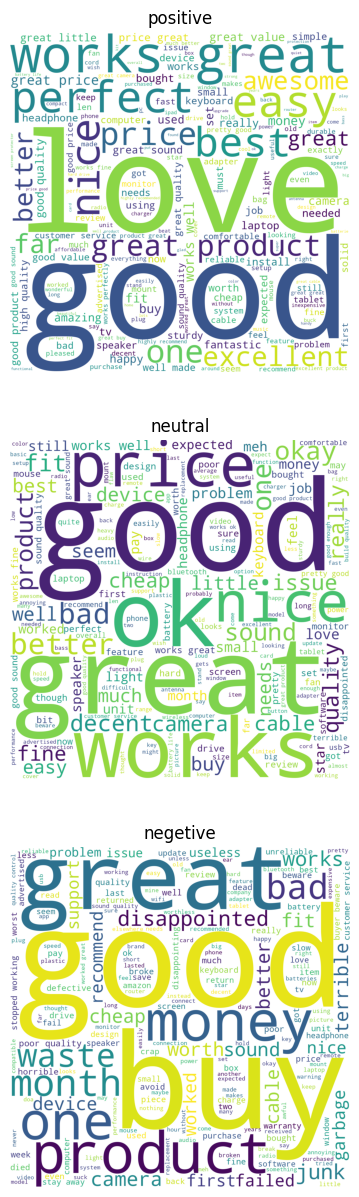

In [ ]:
fig, ax = plt.subplots(len(wordcloud_images), 1, figsize=(15, 15))
titles = ['positive', 'neutral', 'negetive']
for index, image in enumerate(wordcloud_images):
  ax[index].imshow(image)
  ax[index].axis('off')
  ax[index].set_title(titles[index])

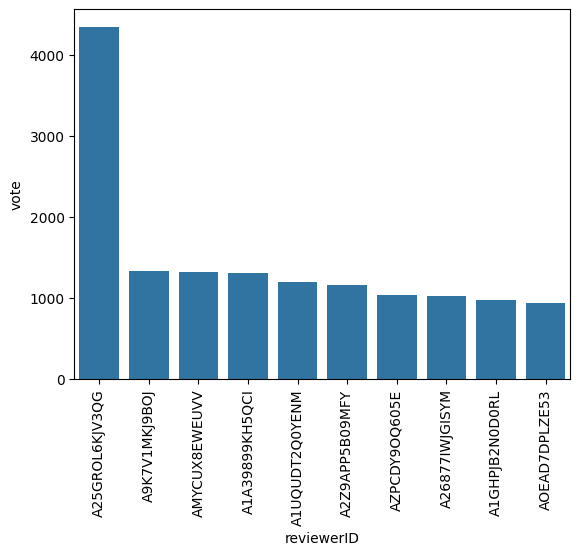

In [ ]:
# most helpful users:
votes = df[['vote', 'reviewerID']]
sum_votes = votes.groupby(by='reviewerID').agg('sum')
sum_votes.sort_values(by='vote' ,inplace=True, ascending=False)
most_voted = sum_votes.iloc[:10]

fig, ax = plt.subplots()
sns.barplot(data=most_voted, x='reviewerID', y='vote', ax=ax)
ax.tick_params(axis='x', rotation=90)

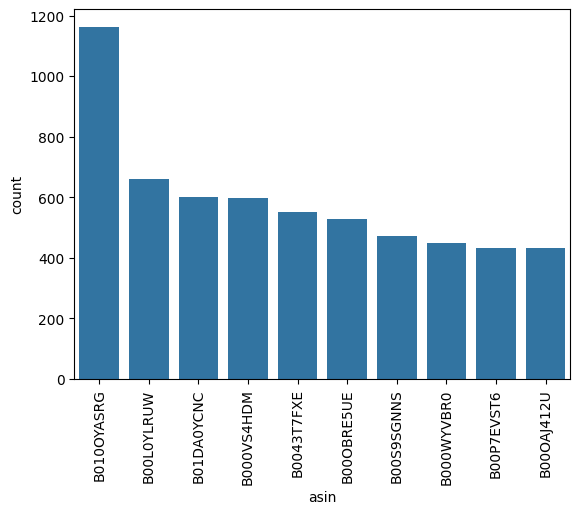

In [ ]:
# most 5 star product
high_star_product = df[df.overall == 5]['asin']
most_rated_products = high_star_product.value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
sns.barplot(data=most_rated_products, ax=ax)
ax.tick_params(axis='x', rotation=90)

<Axes: xlabel='asin'>

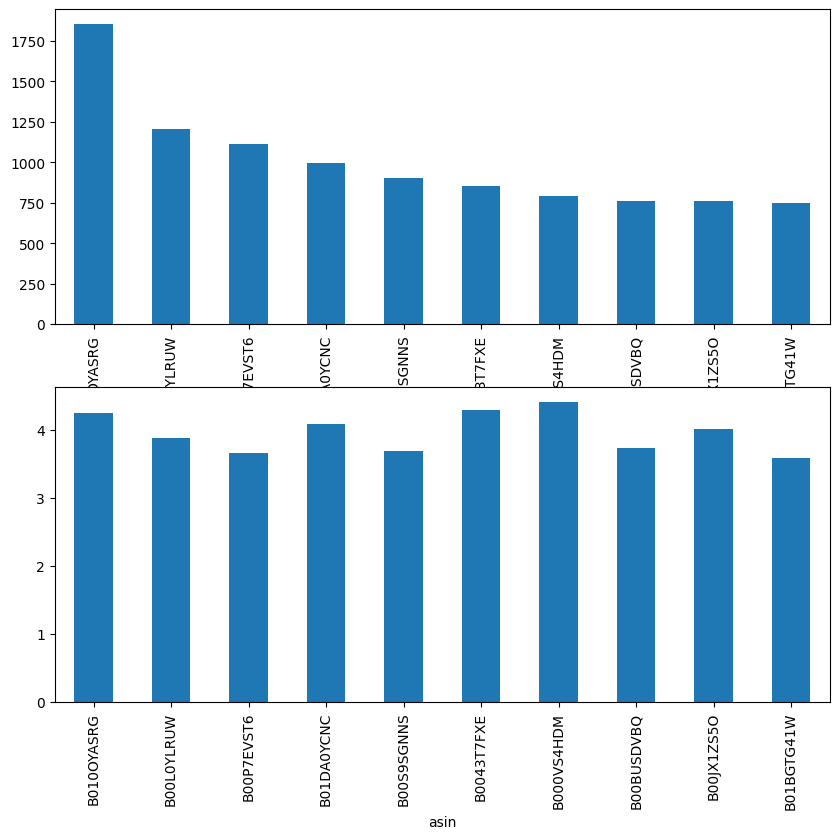

In [ ]:
# most viewed products
most_viewed_products = df[['asin', 'overall']].groupby(by='asin').agg(['count', 'mean'])
most_viewed_products.sort_values(by=('overall', 'count'), ascending=False, inplace=True)

most_viewed_products = most_viewed_products[:10]
# create the bar plot
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
most_viewed_products.overall['count'].plot(kind='bar', ax=ax[0])

most_viewed_products.overall['mean'].plot(kind='bar', ax=ax[1])

In [ ]:
text_length = df.reviewText.apply(len).to_numpy()

def get_percentage_above_number(num :int) -> float:
  l = 0; r = len(text_length) - 1
  mid = int()
  while l < r:
    mid = int((r - l) / 2 + l)
    if text_length[mid] == num:
      break

    if text_length[mid] < num:
      l = mid+1

    else:
      r = mid-1

  return 1 - (mid / len(text_length))

def get_percentage_below_number(num :int) -> float:
  return 1 - get_percentage_above_number(num)


def get_above_range(limit=0.00375) -> int:
  l = 0; r = 30000
  mid = int()
  while l < r:
    mid = int((r - l) / 2 + l)
    ans = get_percentage_above_number(mid)
    if ans > limit:
      l = mid + 1
    else:
      r = mid

  return r

def get_below_range(limit=0.00375) -> int:
  l = 0; r = 30000
  mid = int()
  while l < r - 1:
    mid = int((r - l) / 2 + l)
    ans = get_percentage_below_number(mid)
    if ans > limit:
      r = mid - 1
    else:
      l = mid

  return l

range = [get_below_range(), get_above_range()]
print(range[0], get_percentage_below_number(range[0]))
print(range[1], get_percentage_above_number(range[1]))

233 1.4303696075024241e-05
1873 0.0004910935652439052


Text(0.5, 1.0, 'restricted text length distrbution')

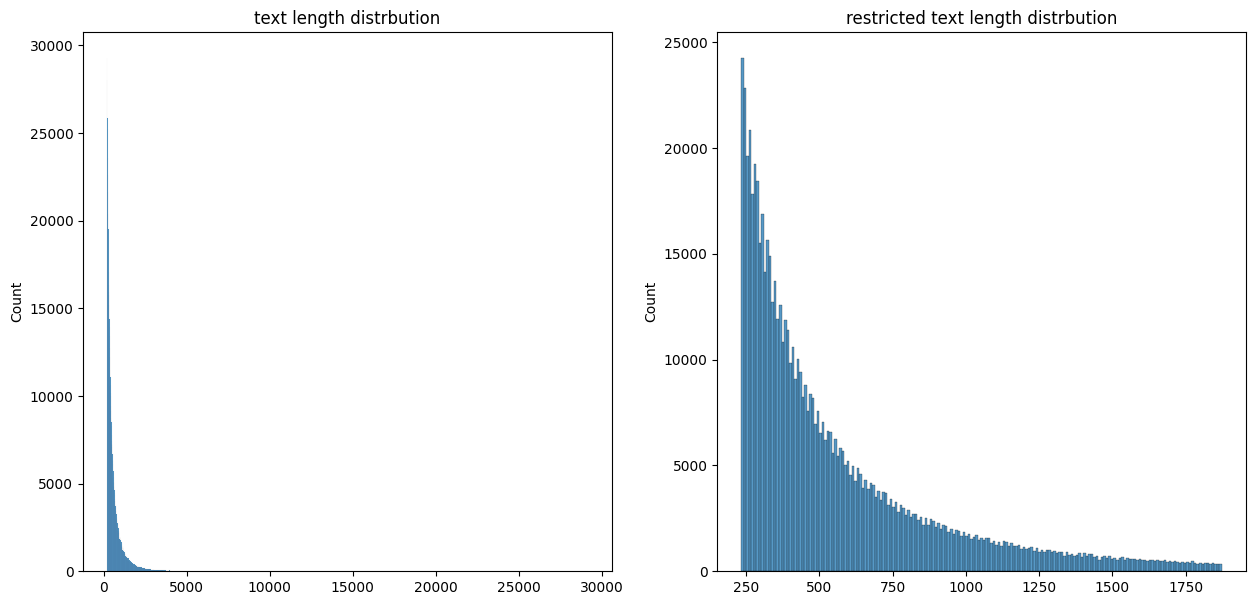

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=text_length, ax = ax[0])
ax[0].set_title('text length distrbution')

sns.histplot(data=text_length, binrange=(range[0], range[1]), ax=ax[1], cbar=True);
ax[1].set_title('restricted text length distrbution')

In [ ]:
# time_df = df[['overall', 'reviewTime']]
# time_df.reviewTime = pd.to_datetime(time_df.reviewTime)
# time_df['year'] = time_df.reviewTime.dt.year
# grouped = time_df.drop(columns=['reviewTime']).groupby(by='year')

data_2016 = grouped.get_group(name=2016)['overall'].to_numpy()
data_2017 = grouped.get_group(name=2017)['overall'].to_numpy()
data_2018 = grouped.get_group(name=2018)['overall'].to_numpy()

print(data_2016.mean(), data_2017.mean(), data_2018.mean() )
print(np.var(data_2016), np.var(data_2017), np.var(data_2018))

4.064321335784888 3.9779557155824055 3.938651245041342
1.7184011495279763 1.8913942352795314 1.9694332905479648


In [ ]:
import scipy.stats as stats
H, p = stats.kruskal(data_2016, data_2017, data_2018)

print("H-statistic:", H)
print("p-value:", p)

H-statistic: 734.1493363891378
p-value: 3.815022965384738e-160


<Axes: xlabel='year', ylabel='count'>

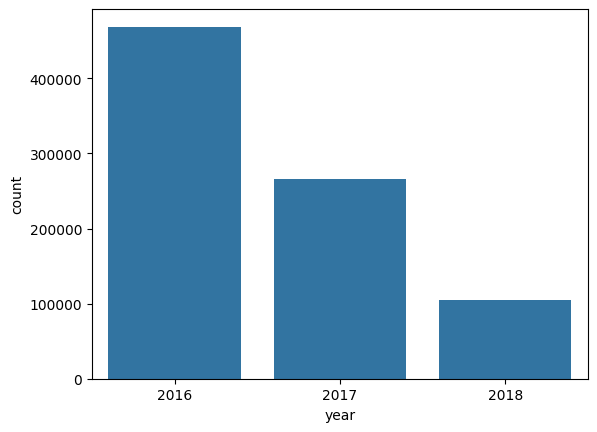

In [ ]:
sns.countplot(data=time_df.drop(columns=['reviewTime']), x='year')

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf
from nltk.corpus import stopwords

nltk.download('all')
stop=set(stopwords.words('english'))

from nlpaug.util import Action

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



---

**detection of unvarified reviews**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         838944 non-null  int64  
 1   vote            838944 non-null  float64
 2   verified        838944 non-null  bool   
 3   reviewTime      838944 non-null  object 
 4   reviewerID      838944 non-null  object 
 5   asin            838944 non-null  object 
 6   style           490613 non-null  object 
 7   reviewerName    838717 non-null  object 
 8   reviewText      838944 non-null  object 
 9   summary         838868 non-null  object 
 10  unixReviewTime  838944 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 64.8+ MB


In [ ]:
# drop columns
vdf = df[['verified', 'reviewText']].copy()
vdf.verified = vdf.verified.apply(np.int_)
vdf['text_len'] = vdf.reviewText.apply(len)
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   verified    838944 non-null  int64 
 1   reviewText  838944 non-null  object
 2   text_len    838944 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 19.2+ MB


In [ ]:
# remove outlier data
vdf = vdf[(233 < vdf.text_len) & (vdf.text_len < 1873)]
vdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700437 entries, 0 to 838943
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   verified    700437 non-null  int64 
 1   reviewText  700437 non-null  object
 2   text_len    700437 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 21.4+ MB


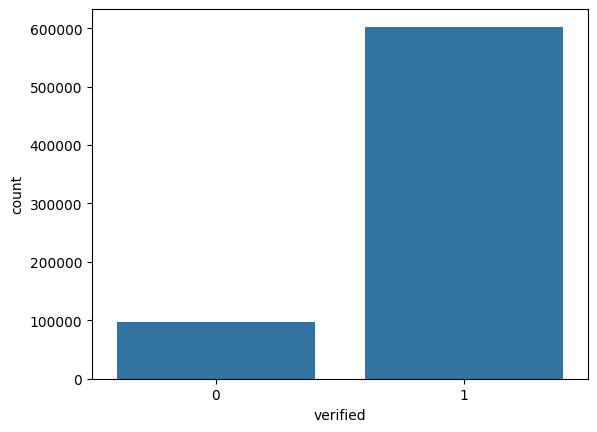

In [ ]:
sns.countplot(data=vdf, x='verified');

In [ ]:
X = vdf.reviewText.to_numpy().reshape(-1, 1)
y = vdf.verified.to_numpy()

In [ ]:
# doing a ranfom under sample
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X, y = under.fit_resample(X, y)
X.shape, y.shape

((293793, 1), (293793,))

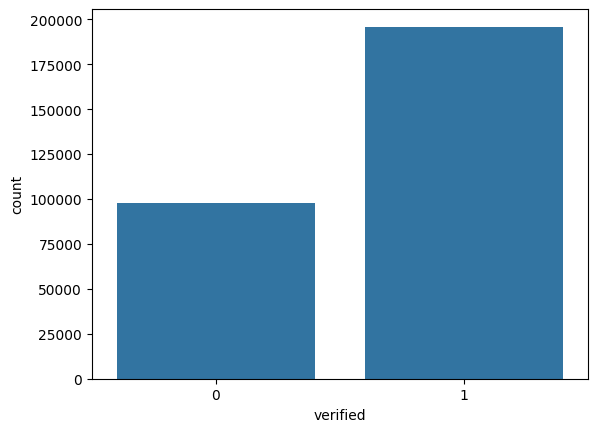

In [ ]:
vdf = pd.DataFrame(np.concatenate((y.reshape(-1, 1), X), axis=1), columns=['verified', 'reviewText'])
sns.countplot(data=vdf, x='verified');

In [ ]:
from sklearn.model_selection import train_test_split
train_vdf, test_vdf = train_test_split(vdf, test_size=0.2, random_state=42)
print(train_vdf.shape, test_vdf.shape)

(235034, 2) (58759, 2)


In [ ]:
def create_corpus(daFrame):
  corpus = []
  for review in tqdm(vdf['reviewText']):
    words = [word.lower() for word in word_tokenize(review) if ((word.isalpha() == 1) & (word not in stop))]
    corpus.append(words)

  return corpus

In [ ]:
corpus = create_corpus(vdf)

100%|██████████| 293793/293793 [06:00<00:00, 813.95it/s]


In [ ]:
# store corpus for future
import pickle
with open('/content/gdrive/My Drive/corpus_list.pkl', 'wb') as f:
  pickle.dump(corpus, f)

In [ ]:
# restore
import pickle
with open('/content/gdrive/My Drive/corpus_list.pkl', 'rb') as f:
    corpus = pickle.load(f)

In [ ]:
# downloading glove model (about 360 mb)
import gdown
url = 'https://drive.google.com/uc?export=download&id=1TwnnybdWYH99_ZpdUKFf5cCdL6lpaRfc'
gdown.download(url, quiet=False, output='/content/gdrive/MyDrive/glove.6B.100d.txt')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1TwnnybdWYH99_ZpdUKFf5cCdL6lpaRfc
From (redirected): https://drive.google.com/uc?export=download&id=1TwnnybdWYH99_ZpdUKFf5cCdL6lpaRfc&confirm=t&uuid=19aff863-8262-4de5-b576-a34e5cffd812
To: /content/gdrive/MyDrive/glove.6B.100d.txt
100%|██████████| 347M/347M [00:07<00:00, 45.5MB/s]


'/content/gdrive/MyDrive/glove.6B.100d.txt'

In [ ]:
embedding_dict={}
with open('/content/gdrive/MyDrive/glove.6B.100d.txt', 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:], 'float32')
    embedding_dict[word] = vectors

f.close()

In [ ]:
print(type(corpus))
print(np.array(corpus).info())

<class 'list'>


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (592775,) + inhomogeneous part.

In [ ]:
MAX_LEN = 50
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
seq = tokenizer.texts_to_sequences(corpus)

review_pad = pad_sequences(seq, maxlen=MAX_LEN, truncating='post', padding='post')

In [ ]:
word_index = tokenizer.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 87370


In [ ]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 87370/87370 [00:00<00:00, 247252.80it/s]


## Baseline Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [ ]:
model = Sequential()
embedding = Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_LEN, trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           8737100   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 8817601 (33.64 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 8737100 (33.33 MB)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(vdf, test_size=0.25, random_state=42)
print(train.shape, test.shape)

(220344, 2) (73449, 2)


In [ ]:
vdf.head()

,verified,reviewText
0,0,I have an older URC-WR7 remote and thought thi...
1,0,I have had this mount for about 4 years now an...
2,0,"SanDisk brands are my favorite, never had any ..."
3,0,"If you want a top-line ereader, go with one of..."
4,0,I've had one of these for years now and love i...


In [ ]:
train_df = review_pad[:vdf.shape[0]]
test_df = review_pad[vdf.shape[0]:]

In [ ]:
X_train, y_train = train_df[:train.shape[0]], train.verified.to_numpy().astype(np.int_)

X_test,y_test = train_df[train.shape[0]:], test.verified.to_numpy().astype(np.int_)

In [ ]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

int32
int64
int32
int64


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(220344, 50)
(220344,)
(73449, 50)
(73449,)


In [ ]:
X_train[0], y_train[0]

(array([   1,  423,  221,  266,    8,  536, 5466,  981,    4, 1903,    4,
           2,   97,  221,   34,   69,  342,  342, 1732,    1,  117, 2841,
        2472, 2078,  969, 1544,    4, 1903,    3, 1732,  346,    2, 1320,
          86,  752,    1,   35,  822,  411,  653, 2165, 1055,  346,  124,
          14,  293,    1,  766,  221,    4], dtype=int32),
 1)

In [ ]:
history=model.fit(X_train,y_train, batch_size=4, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
51399/55086 [==========================>...] - ETA: 4:18 - loss: 0.6378 - accuracy: 0.6669

In [ ]:
aug_w2v = naw.WordEmbsAug(
    model_type='glove', model_path='/content/gdrive/MyDrive/glove.6B.100d.txt',
    action='substitute'
)

In [ ]:
sample = df.reviewText.sample(n=5).to_numpy()
print(sample[0])

aug_w2v.aug_p=0.2
print("Augmented Text:")
for ii in range(5):
    augmented_text = aug_w2v.augment(sample[0])
    print(augmented_text[0])

This is a fantastic lens for portrait photography. It can go down to f/1.8 so you can really blur out the background.

I added a lens filter to protect the lens. http://amzn.to/2ndTIjg

Another great lens is the Canon EF-S 10-18mm f/4.5-5.6 IS STM Lens You can get it on amazon here http://amzn.to/2n8r1md
The 10-18mm is a great lens to go with the 50mm. You can use it to get a good wide angle shot great for landscape photography and everyday shots.

Don't forget to get a good tripod. This one is inexpensive and works great for my needs. http://amzn.to/2mReqSG
Augmented Text:
This is a fantastic lens working portrait photography. It can go down to f / 2001. 8 so you can really blur off the background. I however a lens filter to protect the lens. http: / / amzn. to / 2ndTIjg Another great lens is the Canon EF - S 10 - 18mm f / 4. 5 - 5. 30 IS STM Lens You can get it on amazon same http: / / amzn. to / 2n8r1md The 10 - 18mm is a great lens to go with the 50mm. You simply use it to get a go

In [ ]:
df.overall.value_counts()

overall
5    461485
4    156514
1     82950
3     81239
2     56756
Name: count, dtype: int64

In [ ]:
df = df[['overall', 'reviewText']]
minority = df[~((df.overall == 5) | (df.overall == 4))]

In [ ]:
print(df.info())
print(minority.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     838944 non-null  int64 
 1   reviewText  838944 non-null  object
dtypes: int64(1), object(1)
memory usage: 12.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 220945 entries, 0 to 838941
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     220945 non-null  int64 
 1   reviewText  220945 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.1+ MB
None


In [ ]:
# preprocessing
# print(X.shape, y.shape)

# augument about 25 percent of minority class
import random

num_inctances_to_augument = int(0.2 * len(minority))
print(num_inctances_to_augument)

instances = minority.sample(n=num_inctances_to_augument, random_state=42)
def process_instance(row):
  augmented_text = aug_w2v.augment(row['reviewText'])
  df.loc[len(df.index)] = [row['overall'], augmented_text[0]]

instances.apply(process_instance, axis=1)
print(len(df.index))
df.tail()

44189


KeyboardInterrupt: 

In [ ]:
df.overall.value_counts()

overall
5    461485
4    156514
1     86821
3     84999
2     59439
Name: count, dtype: int64

In [ ]:
X = df.reviewText.to_numpy().reshape(-1, 1)
y = df.overall.to_numpy()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
randomUnderSampler = RandomUnderSampler(sampling_strategy={1: 86821, 2: 59439, 3: 84999, 4: 90000, 5: 90000}, random_state=42)

X, y = randomUnderSampler.fit_resample(X, y)

In [ ]:
np.unique(y, return_counts=True)

(array([1, 2, 3, 4, 5]), array([86821, 59439, 84999, 90000, 90000]))

In [ ]:
import re
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

def text_preprocesser(review):

    url_mention_pattern = r"(?:\@|https?\://)\S+"
    slash = r'\\'
    enter = r'\n'
    non_ASCII = r'[^\x00-\x7f]'
    custom_chars = r'\Ã\±\ã\¼\â\»\§'

    unwanteds_pattern = [url_mention_pattern, custom_chars, non_ASCII, enter, slash]

    for pattern in unwanteds_pattern:
        review = re.sub(pattern, "", review)

    review = re.sub(r"\d+", "<NUMBER>", review)
    review = review.lower()

    verbs = "wouldn't wouldn't won't will weren't weren were wasn't wasn was shouldn't shouldn should've should needn't mustn't mustn mightn it's is isn isn isn't have haven't haven having has hasn hasn't hasn had hadn't hadn been can couldn couldn did didn didn't do does doesn't does doin doing don don't are aren aren't"
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.difference(set(verbs.split(" ")))

    punctuation = set(string.punctuation)
    review = review.lower()

    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(review)
    words = [word for word in words if word not in stop_words and word not in punctuation]

    # spell = SpellChecker()
    # words = [spell.correction(word) for word in words]

    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) if word is not None else '' for word in words]

    return words

In [ ]:
vectorized = np.vectorize(text_preprocesser)
X_prep = vectorized(X)

ValueError: setting an array element with a sequence

In [ ]:
model_4 = Sequential()
model_4.add(Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length))
model_4.add(LSTM(128, return_sequences=True))
model_4.add(Dropout(0.1))
model_4.add(LSTM(256))
model_4.add(Dropout(0.2))
model_4.add(Dense(5, activation='softmax'))

model_4.compile(optimizer=tf.keras.optimizers.AdamW(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

some notes that i should pay attention to:


*   why is a review not verified?
*   what words are not practical?
*   multiple augumention?
*   List item



